In [1]:
#调用库
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import random
import pylab
import matplotlib.pyplot as plt


In [2]:
#定义超参数
batch_sizes = 512 #每批处理数量
device = torch.device("cuda") #利用GPU计算
epochs = 10  #设置迭代次数为 10



In [3]:
#对图像处理
pipeline = transforms.Compose([
    transforms.ToTensor(), #将图片转型为tesnor格式
    transforms.Normalize((0.1307,),(0.3081,)) #降低模型过度拟合,即降低模型复杂度
    
    
])

In [4]:
from torch.utils.data import DataLoader

1.#下载mnist训练集进入文件
train_set= datasets.MNIST("mnist_data", train=True, download= True, transform=pipeline)

2.#下载mnist测试集进入文件
test_set = datasets.MNIST("mnist_data", train=False, download= True, transform=pipeline)

#加载数据
train_loader = DataLoader(train_set, batch_size= batch_sizes, shuffle=True)
test_loader = DataLoader(test_set, batch_size= batch_sizes, shuffle=True)

In [5]:
def get_train_data():
    train_set= datasets.MNIST("mnist_data", train=True, download= True, transform=pipeline)
    train_loader = DataLoader(train_set, batch_size= batch_sizes, shuffle=True)
    
    return train_set, train_loader
    

In [6]:
#构建神经网络try1模型
class neural_network_model_try(nn.Module):
    def __init__(self ):
        super(). __init__()
        self.cv1 = nn.Conv2d(1, 10 ,5 ) 
        self.cv2 = nn.Conv2d(10, 20 ,3 )
        self.fc1 = nn.Linear(20*10*10, 500 )
        self.fc2 = nn.Linear(500, 10)
    def forward (self, x):
        input_size = x.size(0)
        x = self.cv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2, 2)
        x = self.cv2(x)
        x = F.relu(x)
        x = x.view(input_size, -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        outputs = F.log_softmax(x, dim=1)
        
        return outputs
    
       
    
    

In [7]:
#定义优化器
model = neural_network_model_try().to(device)

optimizer = optim.Adam(model.parameters())

In [8]:
#训练模型
def train_model(model, device, train_loader, optimizer, epoch ):
    model.train()
    for batch_index, (data , target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        pred = output.max(1, keepdim=True)
        
        
        
        loss.backward()
        optimizer.step()
        if batch_index % 3500 == 0 :
            print("Train Epoch : {} \t Loss : {:.6f} ".format(epoch, loss.item()))

In [9]:
#测试模型
def test_model(model, device, test_loader ):
    model.eval()
    correct = 0.0
    test_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = F.cross_entropy(output, target).item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /=len(test_loader.dataset) 
        print("Test -- Average loss : {: 4f} , Accuracy : {: 3f} \n ".format(
               test_loss, 100.0* correct / len(test_loader.dataset)))
   

In [10]:
#迭代测试
for epochs in range (1, epochs +1):
    train_model(model, device, train_loader, optimizer, epochs)
    test_model(model, device, test_loader)
   

Train Epoch : 1 	 Loss : 2.306326 
Test -- Average loss :  0.000013 , Accuracy :  96.480000 
 
Train Epoch : 2 	 Loss : 0.107048 
Test -- Average loss :  0.000004 , Accuracy :  97.980000 
 
Train Epoch : 3 	 Loss : 0.046612 
Test -- Average loss :  0.000007 , Accuracy :  98.310000 
 
Train Epoch : 4 	 Loss : 0.059631 
Test -- Average loss :  0.000009 , Accuracy :  98.350000 
 
Train Epoch : 5 	 Loss : 0.038639 
Test -- Average loss :  0.000004 , Accuracy :  98.760000 
 
Train Epoch : 6 	 Loss : 0.036511 
Test -- Average loss :  0.000002 , Accuracy :  98.970000 
 
Train Epoch : 7 	 Loss : 0.019921 
Test -- Average loss :  0.000003 , Accuracy :  98.790000 
 
Train Epoch : 8 	 Loss : 0.020132 
Test -- Average loss :  0.000001 , Accuracy :  99.030000 
 
Train Epoch : 9 	 Loss : 0.005573 
Test -- Average loss :  0.000005 , Accuracy :  98.600000 
 
Train Epoch : 10 	 Loss : 0.020063 
Test -- Average loss :  0.000008 , Accuracy :  99.070000 
 


这张图片被识别为数字8.
这张图片实际为8.
识别正确!
49661


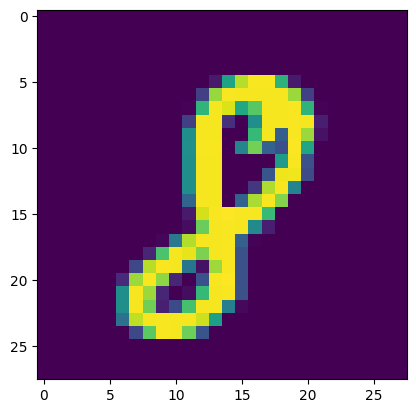

In [12]:
#可视化测试
test_net  = neural_network_model_try()
r = random.randint(0, 59999)
train_data, _ = get_train_data()
output_test = test_net(train_data[r][0].unsqueeze(0))
pred_test = torch.argmax(output_test)
print(f"这张图片被识别为数字{pred_test}.")
print(f"这张图片实际为{train_data[r][1]}.")
 
if pred_test == train_data[r][1]:
    print("识别正确!")
else:
    print("识别错误！")
    
print(r)
plt.imshow(train_data[r][0].squeeze(0))
pylab.show()